In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as s
from numpy.polynomial.polynomial import Polynomial
import seaborn as sns

In [3]:
file_name = "vizier_votable.csv"

df = pd.read_csv(file_name, skiprows=3, delimiter=";", usecols=[0, 1, 2, 3], names=["lambda", "EW", "relDepth", "ConvBS"])
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df = df.astype(float)

lambda_array = df["lambda"].to_numpy()
EW_array = df["EW"].to_numpy()
relDepth_array = df["relDepth"].to_numpy()
ConvBS_array = df["ConvBS"].to_numpy()

df

,lambda,EW,relDepth,ConvBS
0,4051819.0,NaN,0.60,-548.7
1,4053050.0,79.0,0.69,-44.4
2,4053440.0,60.0,0.62,-625.3
3,4055322.0,50.0,0.52,-472.2
4,4056181.0,80.0,0.74,-597.1
...,...,...,...,...
1246,7445072.0,38.0,0.26,-478.5
1247,7447802.0,178.0,0.59,-223.2
1248,7449445.0,38.0,0.23,-413.0
1249,7456050.0,11.0,0.09,-416.1


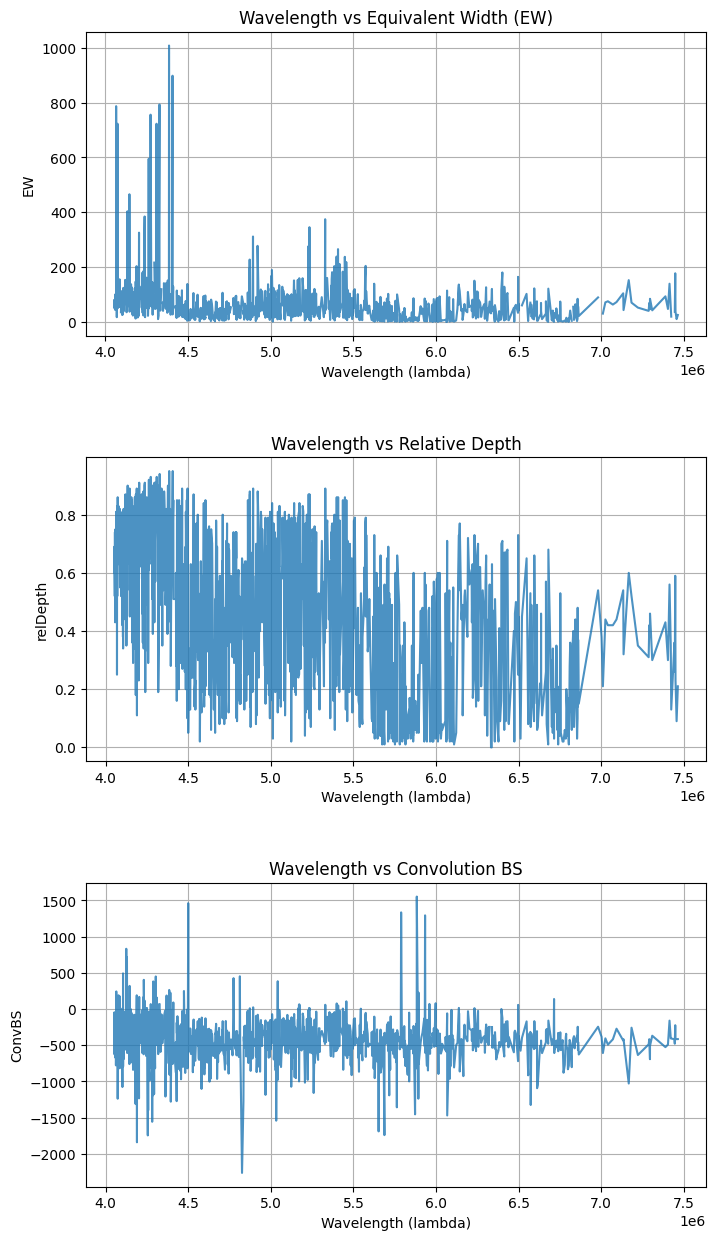

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
plt.subplots_adjust(hspace=0.4)

columns = ["EW", "relDepth", "ConvBS"]
titles = ["Equivalent Width (EW)", "Relative Depth", "Convolution BS"]

for i, col in enumerate(columns):
    axes[i].plot(df["lambda"], df[col], linestyle='-', marker='', alpha=0.8)
    axes[i].set_xlabel("Wavelength (lambda)")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"Wavelength vs {titles[i]}")
    axes[i].grid(True)

plt.show()

In [5]:
file_name = "vizier_votable_VIS.tsv"

df2 = pd.read_csv(file_name, delimiter=";", names=["Wave", "nFlux", "rFlux"])

df2 = df2.astype(float)

wave_array = df2["Wave"].to_numpy()
nflux_array = df2["nFlux"].to_numpy()
rflux_array = df2["rFlux"].to_numpy()

df2

,Wave,nFlux,rFlux
0,24366.984795,0.752675,0.003375
1,24366.988562,0.766579,0.003385
2,24366.992329,0.759569,0.003398
3,24366.996095,0.747408,0.003402
4,24366.999862,0.756657,0.003402
...,...,...,...
3007454,24366.965963,0.781094,0.003321
3007455,24366.969729,0.781869,0.003357
3007456,24366.973496,0.777464,0.003366
3007457,24366.977262,0.760686,0.003361


In [6]:
wavelenght_array = (10**(7))/wave_array
df2["Wave"] = wavelenght_array

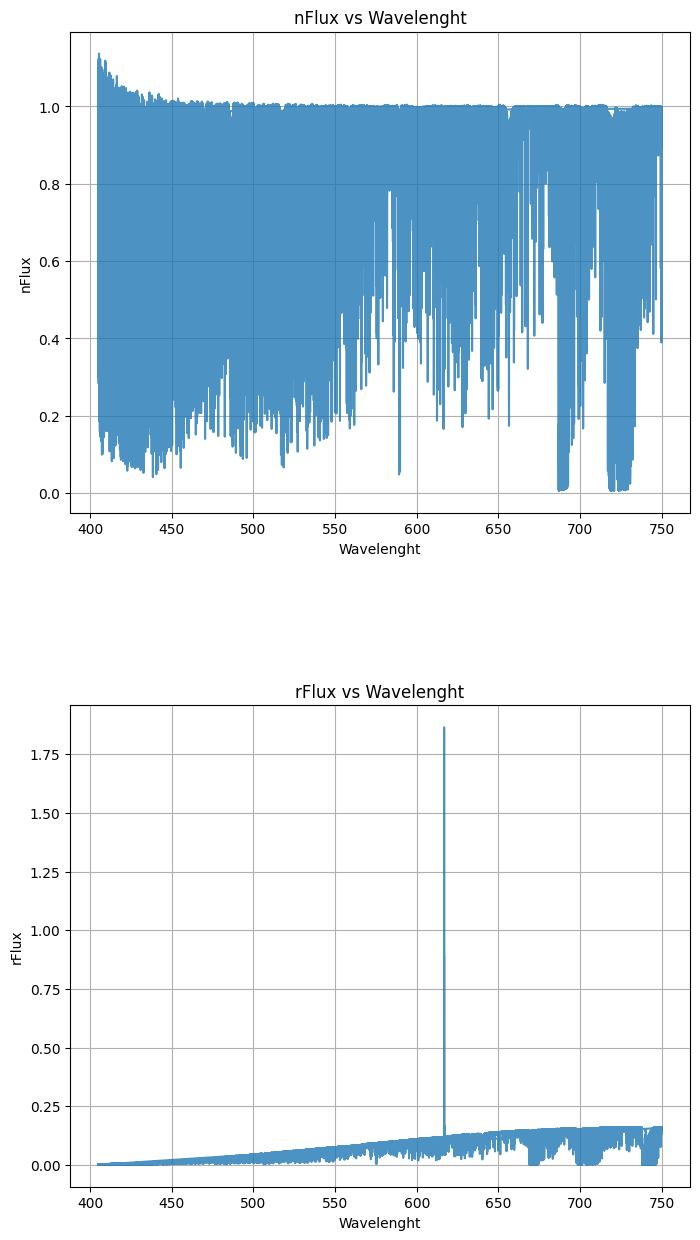

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(8, 15))
plt.subplots_adjust(hspace=0.4)

columns2 = ["nFlux", "rFlux"]
titles2 = ["nFlux", "rFlux"]

for i, col in enumerate(columns2):
    axes[i].plot(df2["Wave"], df2[col], linestyle='-', marker='', alpha=0.8)
    axes[i].set_xlabel("Wavelenght")
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{titles2[i]} vs Wavelenght")
    axes[i].grid(True) 

plt.show()

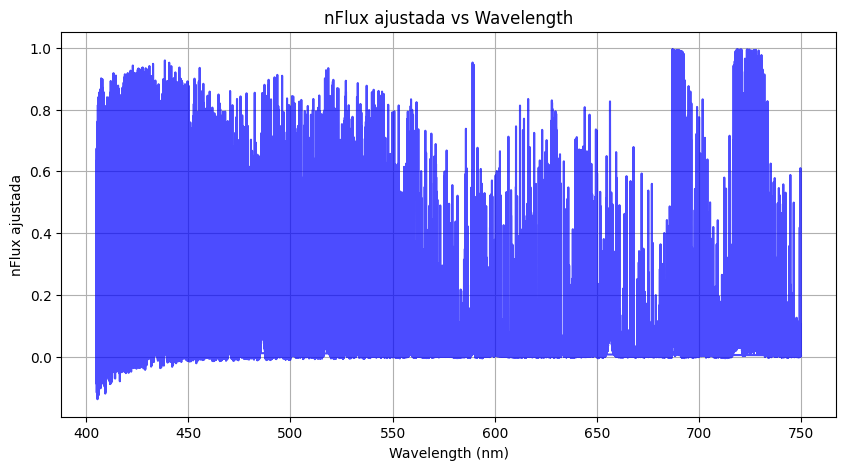

In [10]:
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)

plt.show()

In [52]:
abajo = np.abs(df2["Wave"] - 601).argmin()
arriba = np.abs(df2["Wave"] - 601.1).argmin()
print(abajo, arriba)

955692 954957


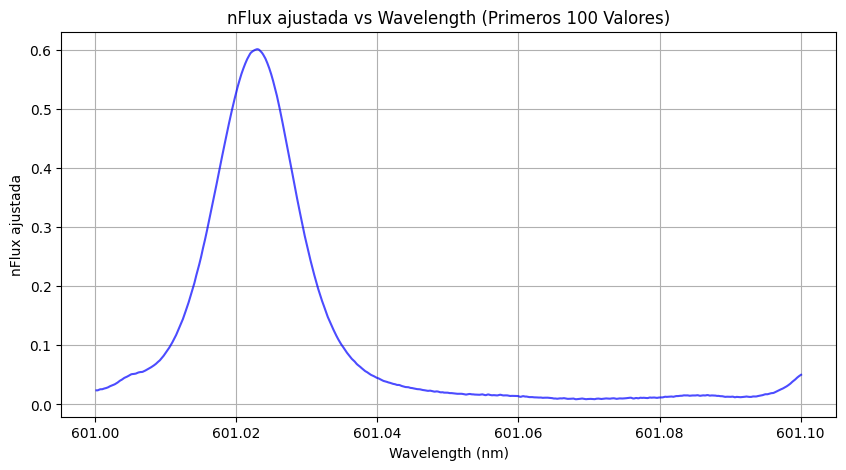

In [53]:
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"][arriba:abajo], df2["nFlux_ajustada"][arriba:abajo], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength (Primeros 100 Valores)")
plt.grid(True)

plt.show()

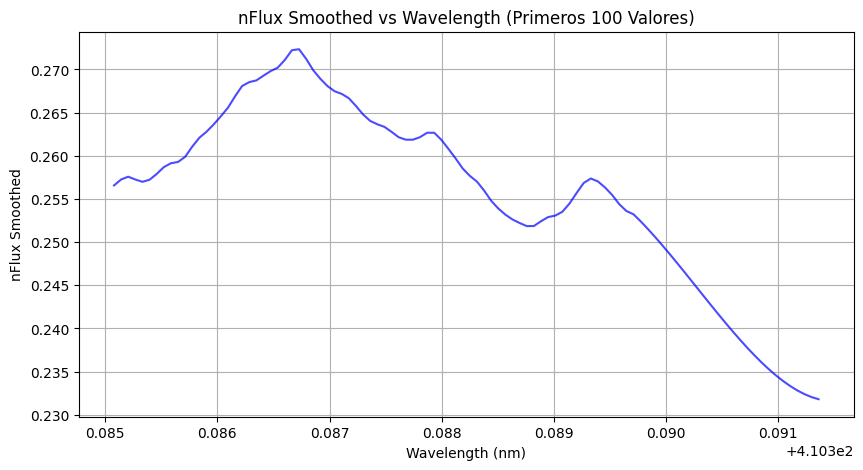

In [12]:
df2["flux_smooth"] = s.savgol_filter(df2["nFlux_ajustada"], window_length=51, polyorder=3)

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"][:100], df2["flux_smooth"][:100], color='blue', alpha=0.7)

plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux Smoothed")
plt.title("nFlux Smoothed vs Wavelength (Primeros 100 Valores)")
plt.grid(True)

plt.show()

C:\Users\esteb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


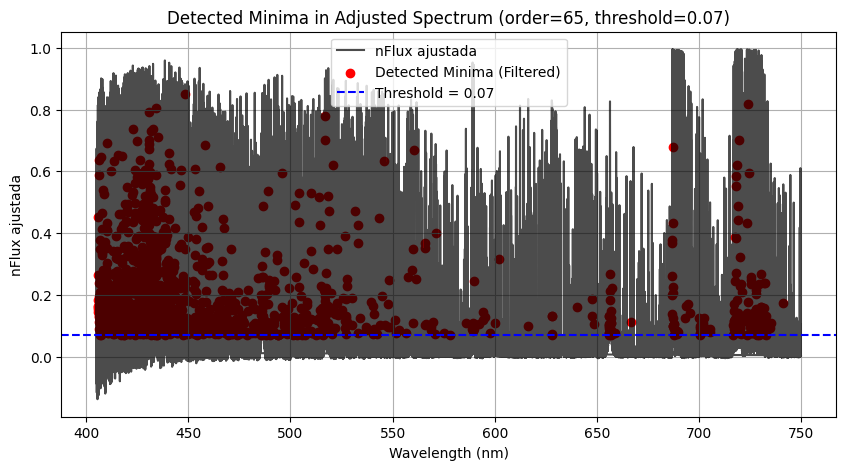

In [38]:
df2["nFlux_ajustada"] = 1 - df2["nFlux"]

# Parámetros de detección
order_value = 65  # Ajusta este valor para encontrar mínimos más prominentes
nFlux_threshold = 0.07  # No detectar mínimos con valores por debajo de este umbral

# Detectar mínimos relativos en `nFlux_ajustada`
min_indices = s.argrelmin(df2["nFlux_ajustada"].values, order=order_value)[0]

# Filtrar los mínimos que están por debajo del umbral
filtered_min_indices = [idx for idx in min_indices if df2["nFlux_ajustada"].iloc[idx] > nFlux_threshold]

# Extraer las longitudes de onda correspondientes a los mínimos filtrados
lambda_minimos = df2["Wave"].iloc[filtered_min_indices]
nFlux_minimos = df2["nFlux_ajustada"].iloc[filtered_min_indices]

# Graficar el espectro con los mínimos detectados después del filtro
plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], label="nFlux ajustada", color='black', alpha=0.7)
plt.scatter(lambda_minimos, nFlux_minimos, color='red', label="Detected Minima (Filtered)", marker='o')
plt.axhline(nFlux_threshold, color='blue', linestyle='--', label=f"Threshold = {nFlux_threshold}")
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title(f"Detected Minima in Adjusted Spectrum (order={order_value}, threshold={nFlux_threshold})")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
print(lambda_minimos)

8          410.390851
183        410.379750
428        410.364210
738        410.344548
1019       410.326727
              ...    
3006293    410.465339
3006467    410.454297
3006815    410.432216
3006881    410.428028
3007426    410.393452
Name: Wave, Length: 1382, dtype: float64


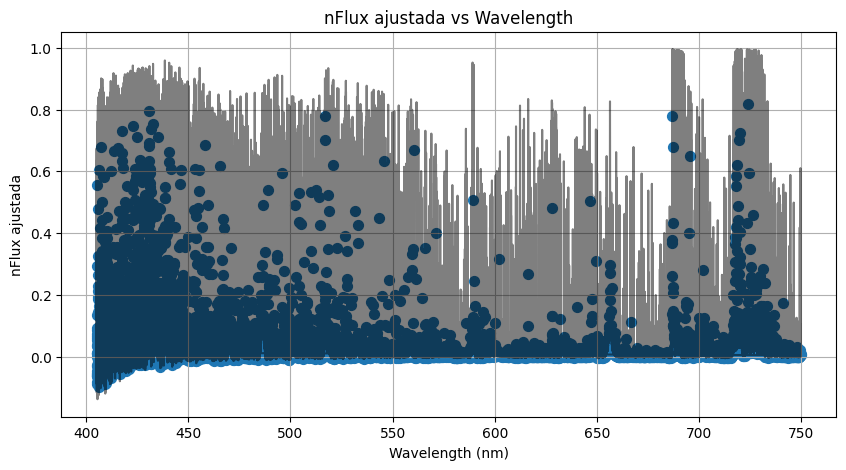

In [151]:
min_indices, properties = s.find_peaks(-df2["flux_smooth"], prominence=0.02, distance=100)

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='black', alpha=0.5)
plt.scatter(df2.iloc[min_indices]["Wave"], df2.iloc[min_indices]["nFlux_ajustada"], s = 50)
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)


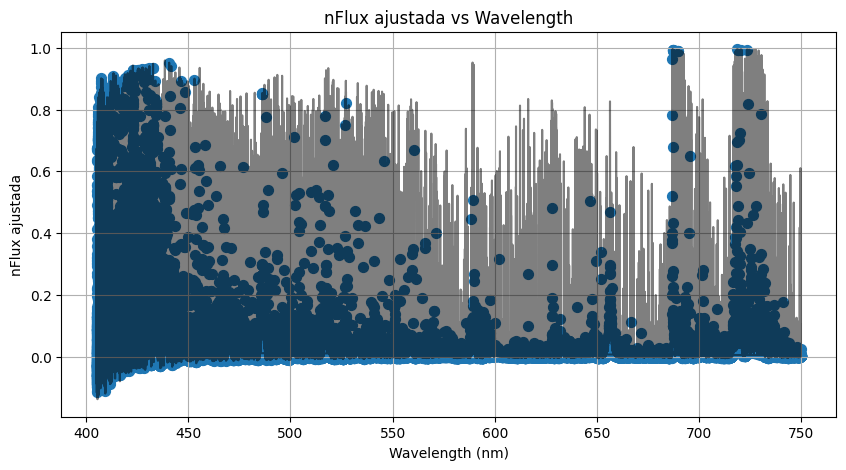

In [152]:
dy = np.gradient(df2["flux_smooth"])
d2y = np.gradient(dy)
# Find zero-crossings of first derivative where it goes from negative to positive
zero_crossings = np.where((dy[:-1] < 0) & (dy[1:] > 0))[0] + 1
# Filter those points by requiring concave-up curvature (second derivative > 0)
min_indices = [i for i in zero_crossings if d2y[i] > 0]

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='black', alpha=0.5)
plt.scatter(df2.iloc[min_indices]["Wave"], df2.iloc[min_indices]["nFlux_ajustada"], s = 50)
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)


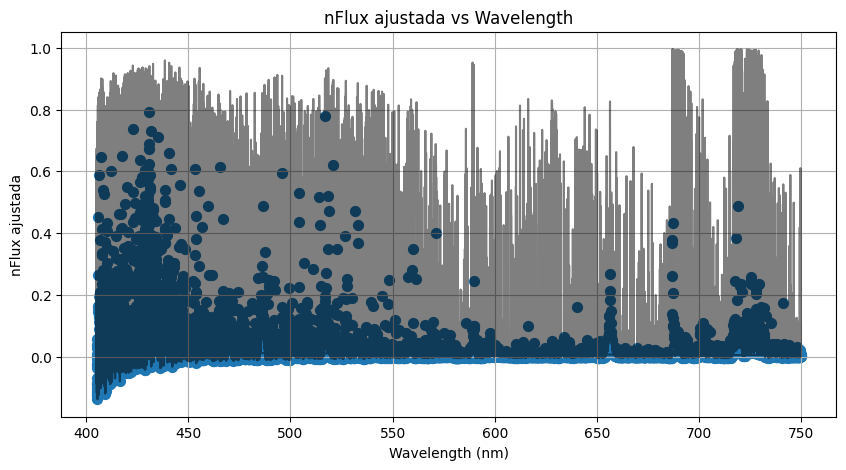

In [ ]:
min_filter = s.argrelmin(df2["nFlux_ajustada"].values, order=100)
#max_filter = s.argrelmax(df2["nFlux_ajustada"].values, order=100)

plt.figure(figsize=(10, 5))
plt.plot(df2["Wave"], df2["nFlux_ajustada"], color='black', alpha=0.5)
plt.scatter(df2.iloc[min_filter]["Wave"], df2.iloc[min_filter]["nFlux_ajustada"], s = 50)
plt.xlabel("Wavelength (nm)")
plt.ylabel("nFlux ajustada")
plt.title("nFlux ajustada vs Wavelength")
plt.grid(True)

plt.show()